In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Milestone 5

Section A: Setup & Load Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset
# Replace with the actual filename
df = pd.read_csv('master.csv')
df.head()

Section B: Treat Dataset as Sample Space

In [ ]:
N = len(df)
print('Total observations:', N)

[ ]
N = len(df)
print('Total observations:', N)
Section C: Task 1 – Defining Events

In [ ]:
# Example event definitions (change column names as needed)
A = df[df['Marks'] > 70]
B = df[df['Section'] == 'A']
C = df[(df['Marks'] >= 50) & (df['Marks'] <= 80)]

print('Event A size:', len(A))
print('Event B size:', len(B))
print('Event C size:', len(C))

Section D: Task 2 – Calculating Basic Probability

In [4]:
P_A = len(A) / N
P_B = len(B) / N
P_C = len(C) / N

print('P(A) =', P_A)
print('P(B) =', P_B)
print('P(C) =', P_C)

NameError: name 'A' is not defined

Section E: Task 3 – Combined Events

In [5]:
A_int_B = df[(df['Marks'] > 70) & (df['Section'] == 'A')]
P_A_int_B = len(A_int_B) / N
print('P(A ∩ B) =', P_A_int_B)

A_union_B = df[(df['Marks'] > 70) | (df['Section'] == 'A')]
P_A_union_B = len(A_union_B) / N
print('P(A ∪ B) =', P_A_union_B)

A_comp = df[df['Marks'] <= 70]
P_A_comp = len(A_comp) / N
print('P(Aᶜ) =', P_A_comp)

rule_value = P_A + P_B - P_A_int_B
print('Rule Verification:', rule_value)
print('Actual P(A ∪ B):', P_A_union_B)

KeyError: 'Marks'

Section F: Visualization

In [ ]:
counts = [len(A), len(A_comp)]
labels = ['A: Marks > 70', 'Aᶜ: Marks ≤ 70']

plt.bar(labels, counts)
plt.title('Event A and Complement Frequency')
plt.ylabel('Count')
plt.show()

In [ ]:
df['Section'].value_counts().plot(kind='bar')
plt.title('Section Frequency')
plt.ylabel('Count')
plt.xlabel('Section')
plt.show()

Milestone 6

A. Setup and Data Loading

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent visual style
sns.set_style('whitegrid')

# Load your dataset (Replace 'your_data.csv' with your actual file name)
try:
    df = pd.read_csv('master.csv')
    # Display the first few rows and info to confirm load
    print("Data loaded successfully:")
    display(df.head())
    df.info()
except FileNotFoundError:
    print("Error: 'your_data.csv' not found. Please update the file path.")
    # Create a dummy DataFrame if the file isn't found, for structure (students should replace this)
    data = {'Score': [75, 88, 62, 95, 70],
            'Section': ['A', 'B', 'A', 'B', 'A'],
            'Age': [20, 21, 20, 22, 21]}
    df = pd.DataFrame(data)


# --- Data Preprocessing (Optional: Add your cleaning/filtering steps here) ---
# Example: df = df.dropna(subset=['Score', 'Section'])

C. Task 1: Define Events

In [ ]:
# --- Define helper functions/filters for the events (A and B) based on your DataFrame ---

# Define Event A: suicides/100k pop > 15
# Using 'suicides/100k pop' as a numerical variable and 15 as a threshold
filter_A = df['suicides/100k pop'] > 15
count_A = len(df[filter_A])

# Define Event B: sex = 'male'
# Using 'sex' as a categorical variable
filter_B = df['sex'] == 'male'
count_B = len(df[filter_B])

# Event A AND B (Intersection)
filter_A_and_B = filter_A & filter_B
count_A_and_B = len(df[filter_A_and_B])

N = len(df) # Total number of observations

print(f"Total Observations (N): {N}")
print(f"Count(A): {count_A}")
print(f"Count(B): {count_B}")
print(f"Count(A ∩ B): {count_A_and_B}")

D. Task 2: Conditional Probability
💡 Knowledge Point: Conditional Probability
The conditional probability of event A occurring, given that event B has already occurred, is calculated as:

P(A∣B)=P(A∩B)P(B)

Where:

P(A∩B)  is the probability of both A and B occurring (Joint Probability).
P(B)  is the probability of B occurring (Marginal Probability).
Compute  P(A) ,  P(B) , and  P(A∣B)  for your chosen events A and B.

In [ ]:
# 1. Compute P(A) and P(B)
P_A = count_A / N
P_B = count_B / N

# 2. Compute P(A ∩ B)
P_A_and_B = count_A_and_B / N

# 3. Compute P(A | B) using the formula
P_A_given_B = P_A_and_B / P_B

print(f"P(A) = {P_A:.4f}")
print(f"P(B) = {P_B:.4f}")
print(f"P(A | B) = {P_A_given_B:.4f}")

E. Task 3: Independence Check
💡 Knowledge Point: Independence of Events
Two events  A  and  B  are independent if the occurrence of one does not affect the probability of the other. Mathematically, this is checked by the Multiplication Rule for Independent Events:

P(A∩B)=P(A)P(B)

If  P(A∩B)≠P(A)P(B) , the events are dependent.

Check if events  A  and  B  are independent by comparing the joint probability  P(A∩B)  with the product  P(A)P(B) .

In [ ]:
product_P_A_P_B = P_A * P_B

print(f"P(A ∩ B) (Empirical Joint Prob): {P_A_and_B:.4f}")
print(f"P(A) * P(B) (Product of Marginal Probs): {product_P_A_P_B:.4f}")

difference = abs(P_A_and_B - product_P_A_P_B)

# Check for approximate equality (Use a small tolerance for 'independence')
if difference < 0.01:
    print("\nConclusion: P(A ∩ B) is approximately equal to P(A)P(B).")
    print("The events A and B are **Independent**.")
else:
    print("\nConclusion: P(A ∩ B) is NOT equal to P(A)P(B).")
    print("The events A and B are **Dependent**.")

F. Task 4: Bayes' Rule
💡 Knowledge Point: Bayes' Rule
Bayes' Rule allows us to reverse the conditional probability. If we know  P(A∣B) , we can find  P(B∣A)  using the following formula:

P(B∣A)=P(A∣B)P(B)P(A)

Use Bayes' Rule to compute  P(B∣A)  from the probabilities calculated in Task 2. Then, compare this result with the empirical value  P(B∣A)  calculated directly from the data.

In [ ]:
# 1. Compute P(B | A) using Bayes' Rule
P_B_given_A_Bayes = (P_A_given_B * P_B) / P_A

# 2. Compute P(B | A) empirically from the dataset (P(A ∩ B) / P(A))
P_B_given_A_Empirical = P_A_and_B / P_A

print(f"P(A | B) (from Task 2): {P_A_given_B:.4f}")
print(f"P(A) (from Task 2): {P_A:.4f}")
print(f"P(B) (from Task 2): {P_B:.4f}")
print("\n---")
print(f"P(B | A) via Bayes' Rule: {P_B_given_A_Bayes:.4f}")
print(f"P(B | A) Empirical: {P_B_given_A_Empirical:.4f}")

# The two values should be mathematically identical (within floating point error)
print(f"Difference: {abs(P_B_given_A_Bayes - P_B_given_A_Empirical):.8f}")

G. Task 5: Probability Distribution (Normal Only)
G1. Explore a Numerical Variable
💡 Knowledge Point: Normal Distribution
The Normal Distribution  X∼N(μ,σ2)  is a continuous, bell-shaped distribution defined entirely by its mean ( mu ) and standard deviation ( sigma ).

The 68-95-99.7 Rule states that approximately:

68% of data falls within  μ±1σ .
95% of data falls within  μ±2σ .
Select a numerical variable (e.g., Score) and analyze its fit to the Normal Distribution.

In [ ]:
# Select your numerical variable
numerical_variable = 'suicides/100k pop' # REPLACE with your chosen numerical variable
data_series = df[numerical_variable]

# 1. Compute Mean (μ) and Standard Deviation (σ)
mu = data_series.mean()
sigma = data_series.std()

print(f"Selected Variable: {numerical_variable}")
print(f"Mean (μ): {mu:.2f}")
print(f"Standard Deviation (σ): {sigma:.2f}")

# 2. Plot Histogram and Overlay Normal Curve
plt.figure(figsize=(10, 6))

# Plot the histogram of the data
sns.histplot(data_series, bins=30, kde=False, color='skyblue', alpha=0.6, stat="density", label='Data Histogram')

# Generate points for the theoretical Normal Distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma) # Probability Density Function (PDF)

# Plot the Normal Distribution curve
plt.plot(x, p, 'k', linewidth=2, label=f'Normal Curve ($\mu={mu:.2f}, \sigma={sigma:.2f}$)')

title = f"Histogram of {numerical_variable} with Normal Distribution Overlay"
plt.title(title)
plt.xlabel(numerical_variable)
plt.ylabel('Density')
plt.legend()
plt.savefig('normal_distribution_plot.png', dpi=300, bbox_inches='tight')
from google.colab import files
files.download('normal_distribution_plot.png')

plt.show()

G2. Normal Probability Questions
💡 Knowledge Point: Calculating Normal Probabilities
We use the scipy.stats.norm functions for calculating theoretical probabilities:

norm.cdf(x, loc=mu, scale=sigma): Calculates  P(X≤x) , the Cumulative Distribution Function.
norm.sf(x, loc=mu, scale=sigma): Calculates  P(X>x) , the Survival Function.
Use the fitted Normal distribution ( X∼N(μ,σ2) ) to compute the required theoretical probabilities.

In [ ]:
# 1. P(X > μ)
# Use the Survival Function (SF) for P(X > x)
P_greater_mu = norm.sf(mu, loc=mu, scale=sigma)

# 2. P(μ - σ < X < μ + σ) - Probability within 1 sigma
lower_1sigma = mu - sigma
upper_1sigma = mu + sigma
# P(Upper) - P(Lower) = P(a < X < b)
P_1sigma = norm.cdf(upper_1sigma, loc=mu, scale=sigma) - norm.cdf(lower_1sigma, loc=mu, scale=sigma)

# 3. P(X < μ - 2σ) - Probability less than 2 sigmas below the mean
# Use the Cumulative Distribution Function (CDF) for P(X <= x)
lower_2sigma = mu - 2 * sigma
P_less_2sigma = norm.cdf(lower_2sigma, loc=mu, scale=sigma)

print(f"Theoretical Probabilities based on N({mu:.2f}, {sigma**2:.2f}):")
print(f"P(X > μ) = {P_greater_mu:.4f}")
print(f"P({lower_1sigma:.2f} < X < {upper_1sigma:.2f}) [1σ range] = {P_1sigma:.4f}")
print(f"P(X < {lower_2sigma:.2f}) [Less than μ-2σ] = {P_less_2sigma:.4f}")

print("\n--- Interpretation ---")
print(f"Interpretation 1: The theoretical probability of a [unit, e.g., student] having a {numerical_variable} **greater than the mean** is {P_greater_mu:.2%}.")
print(f"Interpretation 2: The theoretical probability of a [unit] having a {numerical_variable} **within one standard deviation** of the mean is {P_1sigma:.2%}.")
print(f"Interpretation 3: The theoretical probability of a [unit] having a {numerical_variable} **less than two standard deviations below the mean** is {P_less_2sigma:.2%}.")

H. Task 6: Reflection
Summarize your findings and discuss the broader implications of these concepts.

Milestone 7


--- Task 1: Data Selection and Initial Visualization ---
Independent Variable (X): Study_Hours
Dependent Variable (Y): Exam_Score

Mean of X (Study_Hours): 6.38
Mean of Y (Exam_Score): 79.40
Variance of X: 6.30
Variance of Y: 219.60


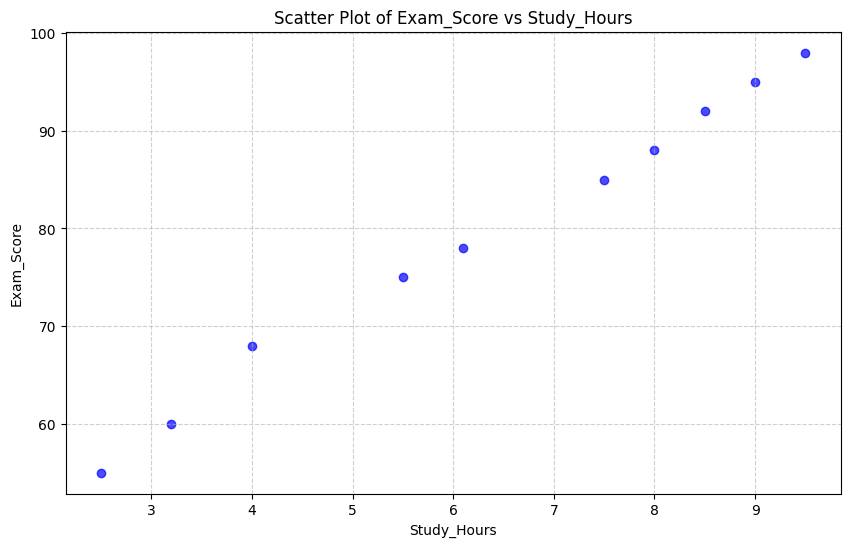


--- Task 2: Manual Calculation of Regression Parameters ---
Numerator (Sum of products of deviations): 333.58
Denominator (Sum of squared deviations of X): 56.66

Computed Slope (β1): 5.8878
Computed Intercept (β0): 41.8357

Estimated Regression Equation: Ŷ = 41.8357 + 5.8878 * X

--- Task 3: Visualization of the Fit ---


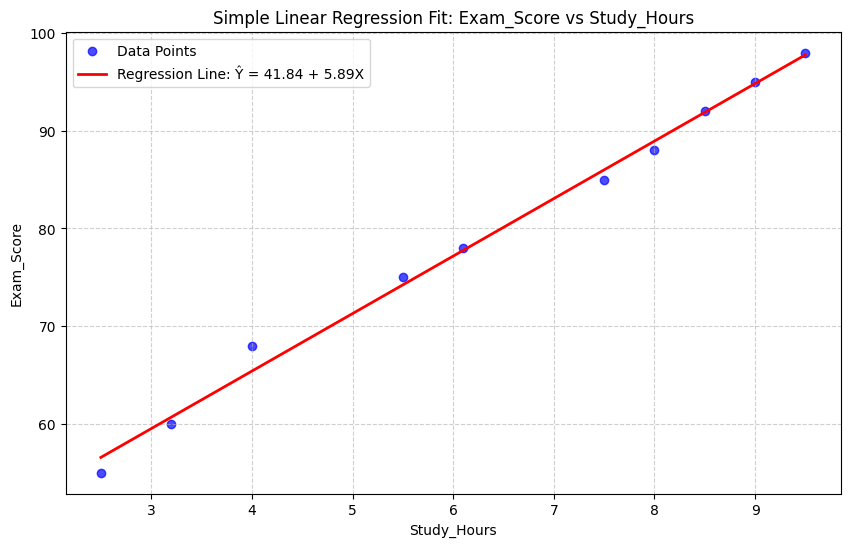


--- Task 4: Strength of Relationship ---
Pearson Correlation Coefficient (r): 0.9969
Coefficient of Determination (R²): 0.9938

--- OPTIONAL: Verification using scikit-learn ---
Manual Slope (β1): 5.8878 | SKL Slope (β1):    5.8878
Manual Intercept (β0): 41.8357 | SKL Intercept (β0):    41.8357
Manual R²: 0.9938 | SKL R²:    0.9938

Verification successful: Manual results match scikit-learn (within tolerance).

--- Task 5: Reflection ---
Complete your reflection in the written report, addressing the quality of the fit and the meaning of the parameters.


In [6]:
# ==============================================================================
# MILESTONE 7: SIMPLE LINEAR REGRESSION (MANUAL COMPUTATION)
# STA 2101: Statistics & Probability
#
# Objective: Calculate the parameters of the best-fit line (β0 and β1) and the
# correlation coefficient (r) using manual calculation methods.
# ==============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- DUMMY DATA SETUP (REPLACE WITH YOUR ACTUAL DATA LOADING) ---
# NOTE: This data is for demonstration. Replace with your actual dataset load.
data = {
    'Study_Hours': [2.5, 3.2, 4.0, 5.5, 6.1, 7.5, 8.0, 8.5, 9.0, 9.5],
    'Exam_Score': [55, 60, 68, 75, 78, 85, 88, 92, 95, 98]
}
df = pd.DataFrame(data)

# --- TASK 1: DATA SELECTION AND INITIAL VISUALIZATION ---
# Select the independent (X) and dependent (Y) variables.
X = df['Study_Hours']
Y = df['Exam_Score']

print("--- Task 1: Data Selection and Initial Visualization ---")
print(f"Independent Variable (X): {X.name}")
print(f"Dependent Variable (Y): {Y.name}\n")

# 1. Compute Summary Statistics
X_mean = X.mean()
Y_mean = Y.mean()
X_var = X.var(ddof=1) # Sample Variance
Y_var = Y.var(ddof=1)

print(f"Mean of X ({X.name}): {X_mean:.2f}")
print(f"Mean of Y ({Y.name}): {Y_mean:.2f}")
print(f"Variance of X: {X_var:.2f}")
print(f"Variance of Y: {Y_var:.2f}")

# 2. Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Data Points', alpha=0.7)
plt.title(f'Scatter Plot of {Y.name} vs {X.name}')
plt.xlabel(X.name)
plt.ylabel(Y.name)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# ------------------------------------------------------------------------------
# --- TASK 2: MANUAL CALCULATION OF REGRESSION PARAMETERS (SLOPE AND INTERCEPT) ---
# ------------------------------------------------------------------------------

print("\n--- Task 2: Manual Calculation of Regression Parameters ---")

# Step 1: Calculate Deviation Scores
# X_dev = (Xi - X_mean)
# Y_dev = (Yi - Y_mean)
X_dev = X - X_mean
Y_dev = Y - Y_mean

# Step 2: Calculate Components for the Slope (β1)
#
# FORMULA for β1 (Slope):
# β1 = [ Σ(Xi - X̄)(Yi - Ȳ) ] / [ Σ(Xi - X̄)² ]
#
# HINT: The numerator is the sum of the product of deviations.
# HINT: The denominator is the sum of the squared deviations of X.

numerator_b1 = (X_dev * Y_dev).sum() # COMPLETED: Implements the numerator calculation
denominator_b1 = (X_dev**2).sum() # COMPLETED: Implements the denominator calculation

print(f"Numerator (Sum of products of deviations): {numerator_b1:.2f}")
print(f"Denominator (Sum of squared deviations of X): {denominator_b1:.2f}")

# Step 3: Compute Slope (β1)
beta_1 = numerator_b1 / denominator_b1 # COMPLETED: Implements the final β1 calculation

print(f"\nComputed Slope (β1): {beta_1:.4f}")

# Step 4: Compute Intercept (β0)
#
# FORMULA for β0 (Y-Intercept):
# β0 = Ȳ - β1 * X̄

beta_0 = Y_mean - beta_1 * X_mean # COMPLETED: Implements the β0 calculation

print(f"Computed Intercept (β0): {beta_0:.4f}")

# Step 5: Formulate the Model
print(f"\nEstimated Regression Equation: Ŷ = {beta_0:.4f} + {beta_1:.4f} * X")

# ------------------------------------------------------------------------------
# --- TASK 3: VISUALIZATION OF THE FIT ---
# ------------------------------------------------------------------------------

print("\n--- Task 3: Visualization of the Fit ---")

# 1. Generate Predictions (Ŷ)
# FORMULA: Ŷi = β0 + β1 * Xi
Y_pred = beta_0 + beta_1 * X # COMPLETED: Implements the prediction calculation

# 2. Plot Regression Line
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Data Points', alpha=0.7)
plt.plot(X, Y_pred, color='red', linewidth=2, label=f'Regression Line: Ŷ = {beta_0:.2f} + {beta_1:.2f}X')
plt.title(f'Simple Linear Regression Fit: {Y.name} vs {X.name}')
plt.xlabel(X.name)
plt.ylabel(Y.name)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# ------------------------------------------------------------------------------
# --- TASK 4: STRENGTH OF RELATIONSHIP (CORRELATION AND R-SQUARED) ---
# ------------------------------------------------------------------------------

print("\n--- Task 4: Strength of Relationship ---")

# 1. Compute Pearson Correlation Coefficient (r)
#
# FORMULA for r:
# r = [ Σ(Xi - X̄)(Yi - Ȳ) ] / [ √[Σ(Xi - X̄)² * Σ(Yi - Ȳ)²] ]
#
# We already have the numerator (numerator_b1) and Σ(Xi - X̄)² (denominator_b1).
# We still need Σ(Yi - Ȳ)²:

sum_squared_deviations_Y = (Y_dev**2).sum() # COMPLETED: Implements Σ(Yi - Ȳ)² calculation
denominator_r = np.sqrt(denominator_b1 * sum_squared_deviations_Y) # COMPLETED: Implements the denominator of r

r = numerator_b1 / denominator_r # COMPLETED: Implements the final r calculation
print(f"Pearson Correlation Coefficient (r): {r:.4f}")

# 2. Compute Coefficient of Determination (R²)
# FORMULA: R² = r²
R_squared = r**2 # COMPLETED: Implements the R² calculation
print(f"Coefficient of Determination (R²): {R_squared:.4f}")

# ------------------------------------------------------------------------------
# --- OPTIONAL SECTION: Compare with scikit-learn Library Solution ---
# This section is strictly for verification of your manual calculations.
# ------------------------------------------------------------------------------

try:
    from sklearn.linear_model import LinearRegression
    print("\n--- OPTIONAL: Verification using scikit-learn ---")

    # Reshape X for scikit-learn (required for single feature)
    X_skl = X.values.reshape(-1, 1)

    # Create and train the model
    model = LinearRegression()
    model.fit(X_skl, Y)

    # Extract parameters
    skl_beta_0 = model.intercept_
    skl_beta_1 = model.coef_[0]
    skl_R_squared = model.score(X_skl, Y) # R^2 score

    print(f"Manual Slope (β1): {beta_1:.4f} | SKL Slope (β1):    {skl_beta_1:.4f}")
    print(f"Manual Intercept (β0): {beta_0:.4f} | SKL Intercept (β0):    {skl_beta_0:.4f}")
    print(f"Manual R²: {R_squared:.4f} | SKL R²:    {skl_R_squared:.4f}")

    if np.isclose(beta_1, skl_beta_1, atol=1e-4) and np.isclose(beta_0, skl_beta_0, atol=1e-4):
        print("\nVerification successful: Manual results match scikit-learn (within tolerance).")
    else:
        print("\nVerification failed: Manual results DO NOT closely match scikit-learn.")

except ImportError:
    print("\nOPTIONAL: scikit-learn is not installed. Skipping comparison.")
except NameError:
     print("\nOPTIONAL: Cannot run comparison. Ensure all manual variables (beta_0, beta_1, R_squared) are correctly defined above.")

# ------------------------------------------------------------------------------
# --- TASK 5: REFLECTION (To be completed in your written report) ---
# ------------------------------------------------------------------------------

print("\n--- Task 5: Reflection ---")
print("Complete your reflection in the written report, addressing the quality of the fit and the meaning of the parameters.")